# Step 1: Data Understanding and Exploratory Data Analysis (EDA)

Performing an exploratory data analysis to understand the dataset's structure, types of variables and any potential issues that need addressing.

1. Load the Data
2. Inspect the Data
3. Statistical Summary
4. Visual Exploration

In [23]:
import pandas as pd

In [24]:
# Loading data file
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

In [25]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset provided for the Australian housing market, comprising 1460 entries and 81 features, offers a comprehensive view of the housing characteristics. The primary objective is to predict house prices, a task that will be approached through regression analysis.

In [26]:
data_head = data.head()
data_head

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Glimpse of the first few rows:**

It contains various features related to the properties, like MSSubClass, MSZoning, LotFrontage, LotArea, etc.

The target variable we are interested in predicting is SalePrice.

There are 81 columns, indicating a wide range of features.

In [27]:
data_description = data.describe()
data_description

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


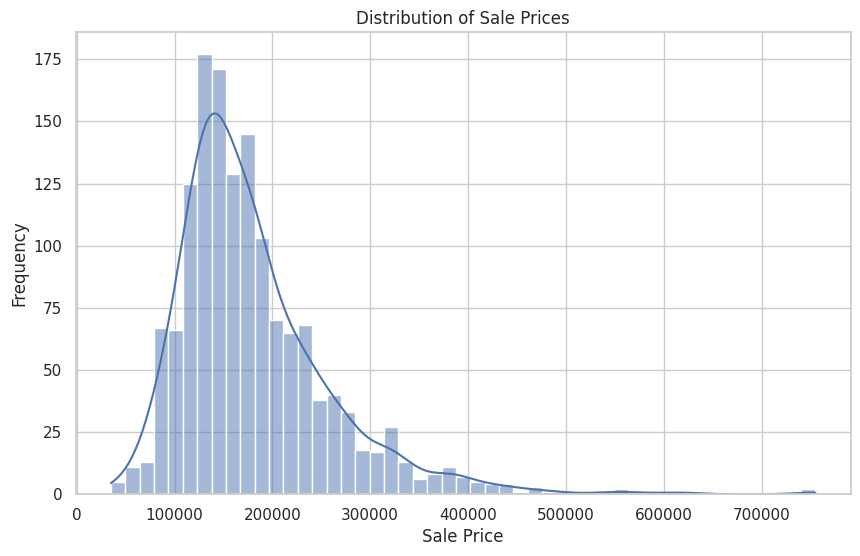

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


The target variable, SalePrice, exhibits a right-skewed distribution, suggesting most houses are concentrated in the lower price bracket with a few extending into the higher range.
The mean sale price stands at approximately \$180,921, spanning a broad range from \$34,900 to \$755,000.

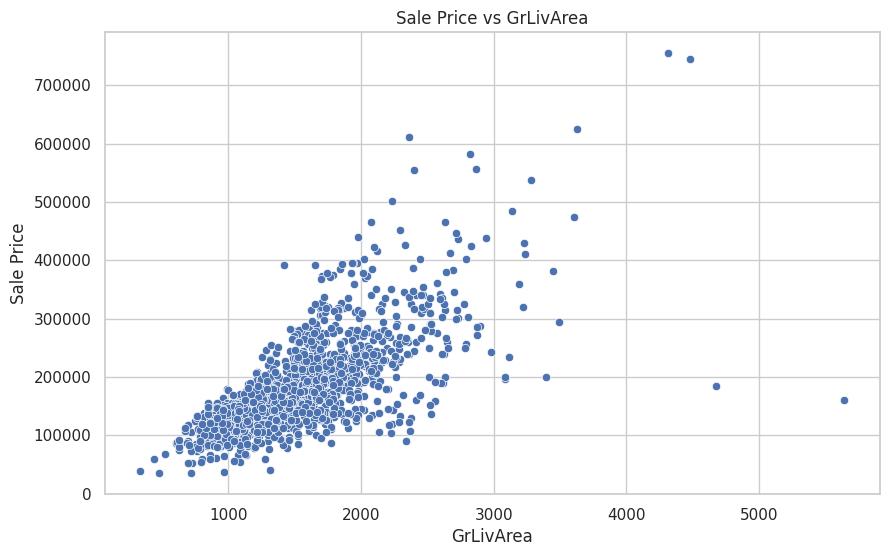

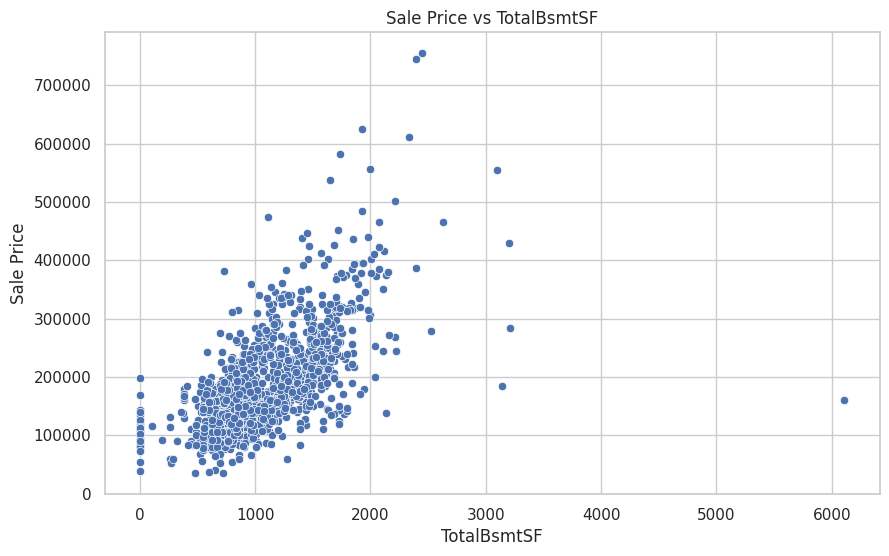

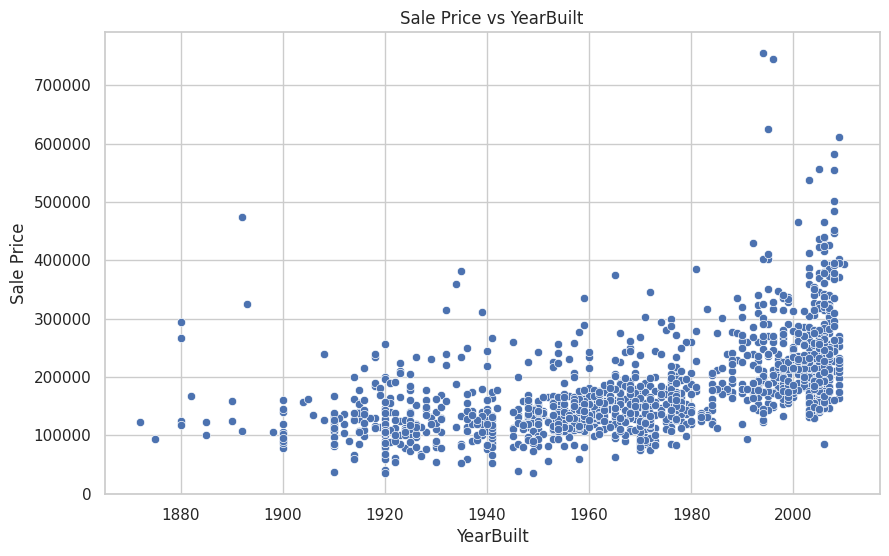

In [29]:
# Selecting a few numerical variables for scatter plots
numerical_vars = ['GrLivArea', 'TotalBsmtSF', 'YearBuilt']

# Scatter plots for selected numerical variables vs SalePrice
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=var, y='SalePrice')
    plt.title(f'Sale Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Sale Price')
    plt.show()

###**Numerical Variables**:
**GrLivArea:**
A positive correlation is observed between living area square footage and sale price, indicating that larger homes tend to fetch higher prices.

**TotalBsmtSF:** The basement area also shows a similar positive trend with the sale price, aligning with the notion that more space equates to a higher value.

**YearBuilt:** Newer houses generally command higher prices, although the relationship is not strictly linear, hinting at the influence of other factors like location and amenities.

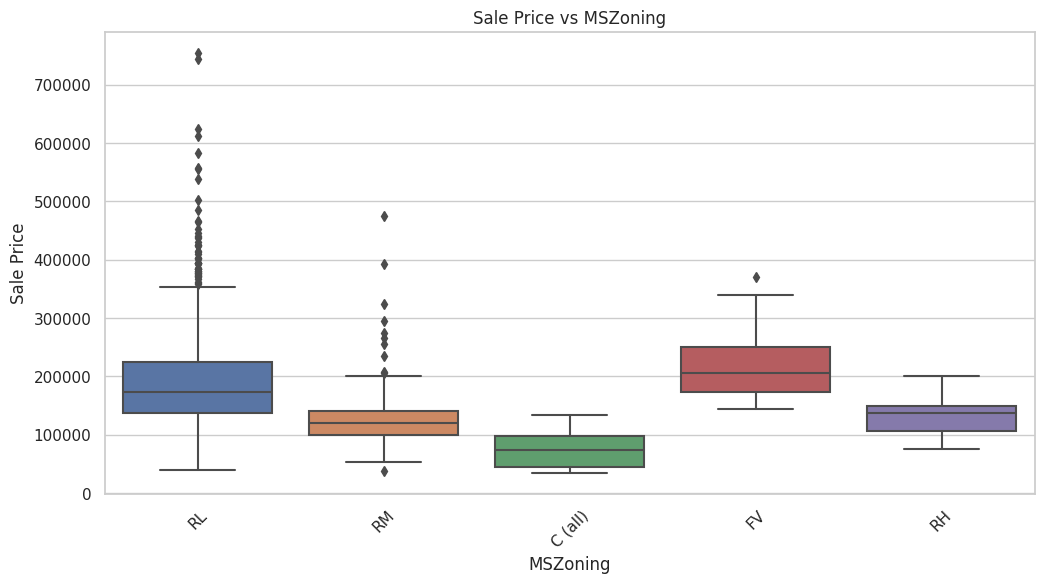

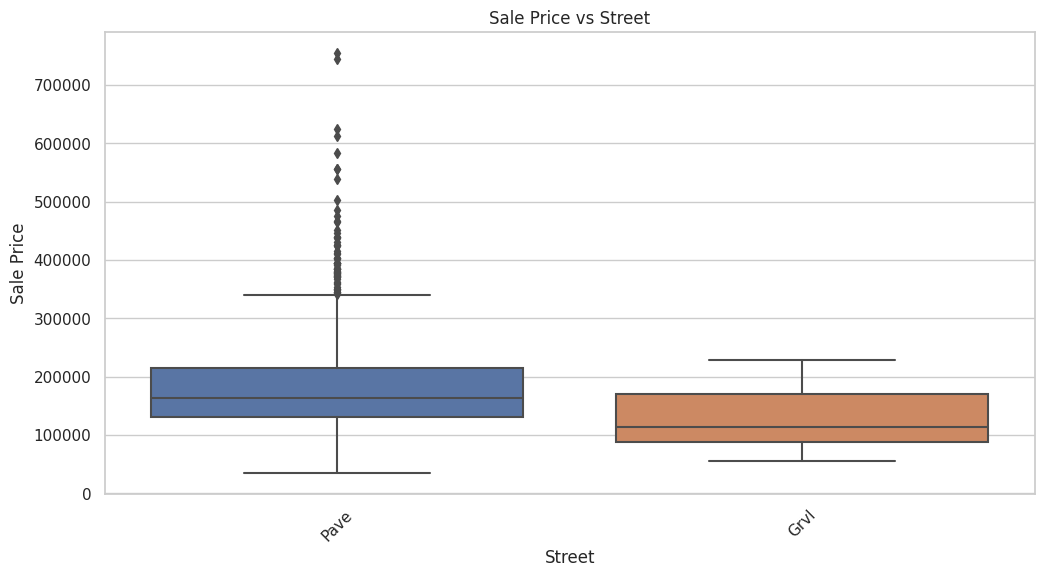

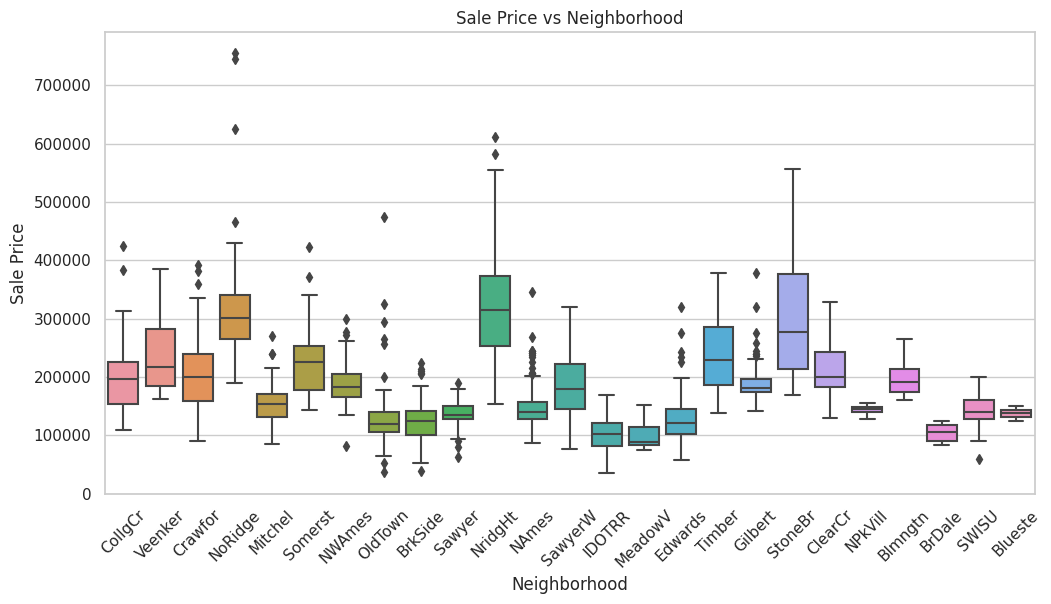

In [30]:
# Selecting a few categorical variables
categorical_vars = ['MSZoning', 'Street', 'Neighborhood']

# Box plots for selected categorical variables vs SalePrice
for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=var, y='SalePrice')
    plt.title(f'Sale Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)
    plt.show()


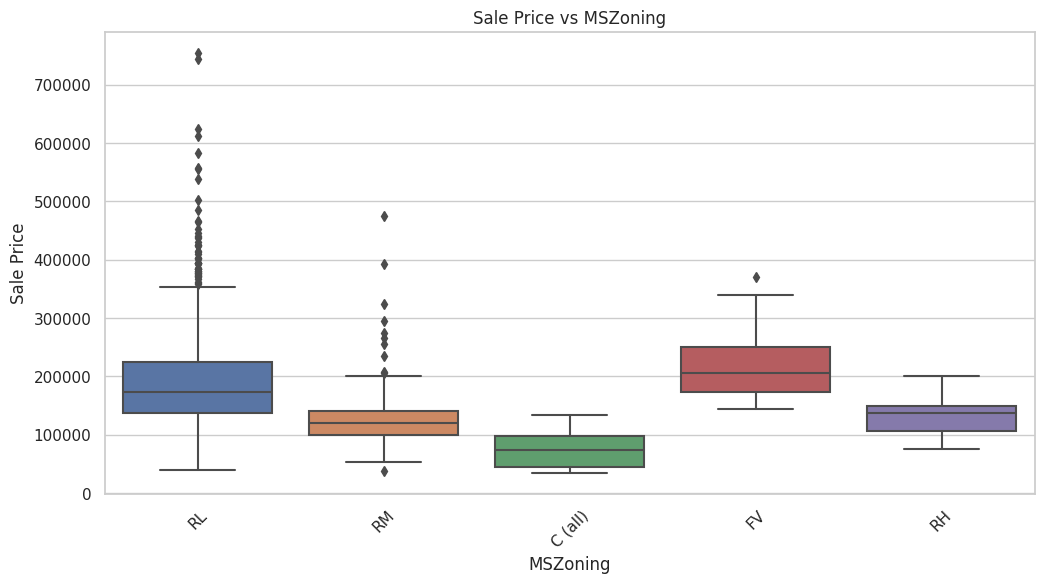

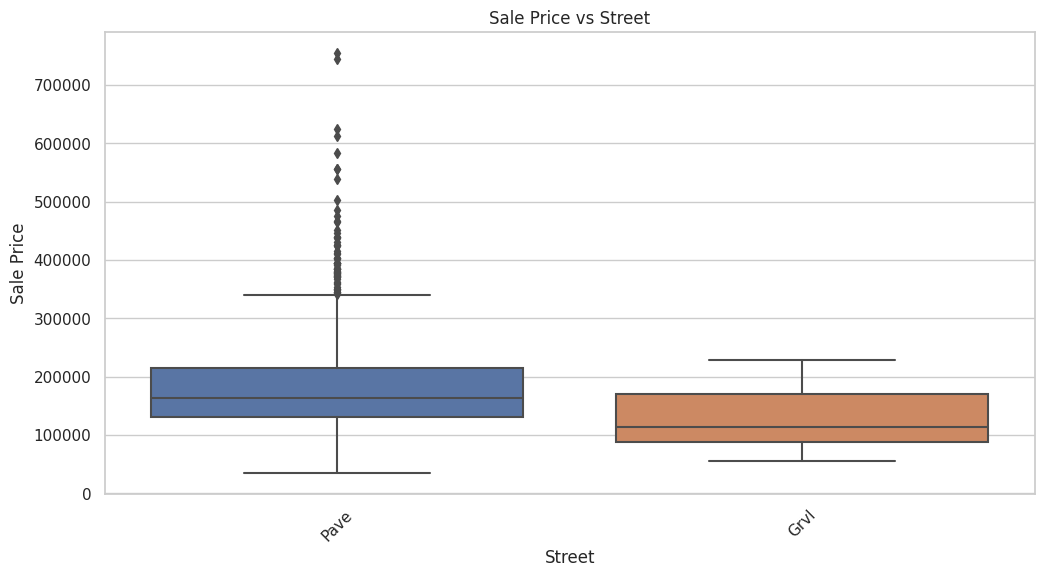

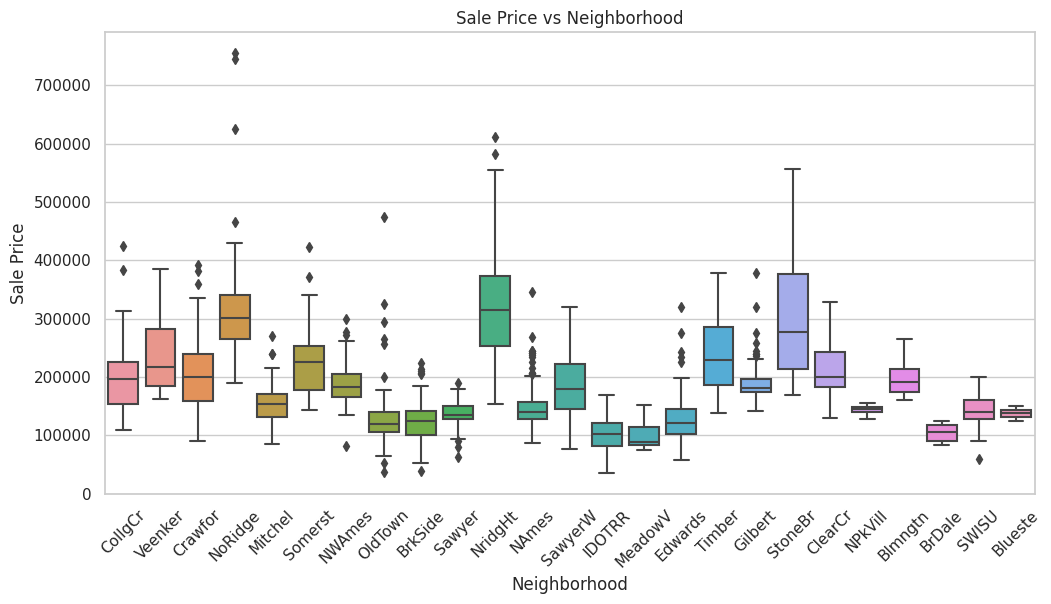

In [31]:
# Selecting a few categorical variables
categorical_vars = ['MSZoning', 'Street', 'Neighborhood']

# Box plots for selected categorical variables vs SalePrice
for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=var, y='SalePrice')
    plt.title(f'Sale Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)
    plt.show()


###**Categorical Variables:**
**MSZoning:** The zoning classification of properties shows a marked impact on prices. Residential zones like FV and RL are associated with higher median prices, reflecting the desirability and utility of the areas.

**Street:** While most data points relate to Paved streets, a marginal variation in prices based on street type is noted.

**Neighborhood:** A significant determinant of price, with certain neighborhoods exhibiting substantially higher median prices. This variation underscores the influence of location on property value.

The initial EDA highlights the multifaceted nature of real estate pricing, where both physical attributes (like area, age) and locational aspects (like zoning, neighborhood) play crucial roles. The next steps in the analysis would involve meticulous data cleaning, handling missing values, encoding categorical variables, and feature engineering to prepare the data for regression modeling. This model will aid in understanding the pricing dynamics and assist in making informed investment decisions in the Australian housing market.

# Step 2: Data Preparation:



In [32]:
# Identifying columns with missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

In [33]:
# Percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

In [34]:
# Creating a dataframe for missing data analysis
missing_data = pd.DataFrame({'Missing Values' : missing_values, 'Percentage' : missing_percentage})
missing_data

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


**PoolQC (99.52% missing):** Indicates pool quality.
MiscFeature (96.30% missing): Miscellaneous feature not covered in other categories.

**Alley (93.77% missing):** Type of alley access to the property.
Fence (80.75% missing): Fence quality.

**FireplaceQu (47.26% missing):**
Fireplace quality.

**LotFrontage (17.74% missing):** Linear feet of street connected to the property.


And several other variables with lower percentages of missing data, related mostly to garage and basement features, as well as masonry veneer.

### **Strategies for Handling Missing Values:**

**High Missing Percentage (> 50%):** For columns like PoolQC, MiscFeature, Alley, and Fence, we might consider dropping them since a high percentage of values are missing, which might not contribute significantly to our model.

**Moderate to Low Missing Percentage:**
For other columns, we can consider different strategies:
Imputation: For continuous variables like LotFrontage, we might use mean, median, or even a more complex imputation method based on other features.
**Category Imputation:** For categorical features like FireplaceQu, we could impute with a new category (e.g., 'None' or 'NA') or the mode.

**Garage and Basement Features:** Similar to FireplaceQu, we can impute missing values with 'None' or 'NA' for categorical and 0 for numerical features, assuming the absence of a garage or basement.

**Special Cases:**
MasVnrType and MasVnrArea: Given the low percentage of missing values, we might impute these with the mode (for MasVnrType) and median or mean (for MasVnrArea).

**Electrical:** With only one missing value, we can impute it with the mode.

In [35]:
# Identifying columns with missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_percentage = (missing_values / len(data)) * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index

In [36]:
# Drop columns with high missing values (>50% missing)
housing_data_cleaned = data.drop(columns=columns_to_drop)

In [37]:
# Impute Missing Values
# List of numerical and categorical columns to be imputed
numerical_cols_with_missing = ['LotFrontage']
categorical_cols_with_missing = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
                                 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
                                 'MasVnrType', 'MasVnrArea', 'Electrical', 'FireplaceQu']

In [38]:
# Imputing numerical columns with median
for col in numerical_cols_with_missing:
    housing_data_cleaned[col].fillna(housing_data_cleaned[col].median(), inplace=True)

In [39]:
# Imputing categorical columns
for col in categorical_cols_with_missing:
    # If a feature like Garage, Basement or Fireplace is missing, it might mean the property doesn't have one.
    # We'll fill these with 'None' (for categorical) or 0 (for numerical)
    if 'Garage' in col or 'Bsmt' in col or col == 'FireplaceQu':
        if housing_data_cleaned[col].dtype == 'object':
            housing_data_cleaned[col].fillna('None', inplace=True)
        else:
            housing_data_cleaned[col].fillna(0, inplace=True)
    # For other categorical features, use mode (most frequent value)
    else:
        housing_data_cleaned[col].fillna(housing_data_cleaned[col].mode()[0], inplace=True)


In [40]:
housing_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#**Step 3: Model Training**

We will focus on linear regression models, specifically exploring regularized versions like Ridge and Lasso Regression. Here's a detailed, original analysis and approach for this step:

**Feature Encoding:**
Before training the model, we need to encode categorical variables. We will use one-hot encoding to transform categorical variables into a format that can be used by the regression models.

**Feature Selection:**
We will assess the features to identify those most relevant to house prices. This can be initially done based on correlation with the target variable and domain understanding.

**Data Splitting:**
The data will be split into a training set and a test set. The training set will be used to train the model, and the test set will be used to evaluate its performance.

**Model Selection and Training:**
We will use Ridge and Lasso Regression, which are regularized forms of linear regression. Regularization helps to prevent overfitting by penalizing large coefficients.
The optimal value of the regularization parameter (lambda) will be determined using cross-validation.

**Model Evaluation:**
The models will be evaluated based on metrics suitable for regression tasks, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

**Model Interpretation:**
We will interpret the model coefficients to understand the influence of each feature on house prices.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [54]:
# Feature Selection: Dropping non-relevant features like 'Id'
X = housing_data_cleaned.drop(['Id', 'SalePrice'], axis=1)
y = housing_data_cleaned['SalePrice']

In [43]:
# Encoding categorical variables
X = pd.get_dummies(X)

# Data Splitting: 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Model Training: Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predicting on test data
y_pred = linear_reg.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [57]:
r2, mae, mse, rmse

(0.640252021560348, 20667.187714474207, 2759384347.0082517, 52529.842442256115)

**Model Evaluation:**
After training, the model's performance was evaluated on the testing set using various metrics:

**a. R-squared (0.6403):**
This value indicates that approximately 64.03% of the variance in the house prices can be explained by the model. It's a measure of how well the observed outcomes are replicated by the model.

**b. Mean Absolute Error (MAE) (20,667.19):**
MAE provides the average magnitude of errors in a set of predictions, without considering their direction. An MAE of 20,667.19 suggests that the average prediction error of the house prices is around \$20,667.

**c. Mean Squared Error (MSE) (2,759,384,347.01):**
MSE is a measure of the average of the squares of the errors. The higher the MSE, the larger the error. A high MSE in this case indicates that there might be significant variations in the predictions.

**d. Root Mean Squared Error (RMSE) (52,529.84):**
RMSE is the square root of the MSE and provides a measure of the error in the same units as the target variable. An RMSE of 52,529.84 means the standard deviation of the prediction errors is about $52,529.

**Interpretation:**

While the R-squared value indicates a moderate fit, there is room for improvement. The MAE and RMSE values suggest that there might be some significant discrepancies in the predictions.

Given these metrics, the model is decent but not highly accurate in predicting house prices. This might be due to various factors like the presence of non-linear relationships, outliers, or important predictors not being captured adequately.

To improve the model, we could explore more complex models, feature engineering, or handle outliers and non-linearity.
Regularization techniques like Ridge or Lasso regression might also be beneficial, especially if overfitting is suspected.

In [84]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [85]:
# Separate the features and the target variable
X = housing_data_cleaned.drop('SalePrice', axis=1)
y = housing_data_cleaned['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [86]:
# Ridge Regression
ridge_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', Ridge())])

# Lasso Regression
lasso_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', Lasso())])

# Parameters for GridSearchCV
ridge_params = {'regressor__alpha': np.logspace(-4, 4, 20)}
lasso_params = {'regressor__alpha': np.logspace(-4, 4, 20)}

# GridSearchCV for Ridge
ridge_gs = GridSearchCV(ridge_pipe, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_gs.fit(X_train, y_train)

# GridSearchCV for Lasso
lasso_gs = GridSearchCV(lasso_pipe, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151216218382.47842, tolerance: 474197795.0469258
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118396459358.18573, tolerance: 483985512.6952247
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120969786180.57759, tolerance: 484203806.08044505
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Conv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', '...
             param_grid={'regressor__alpha': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [89]:
# Evaluating the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [90]:
ridge_results = evaluate_model(ridge_gs, X_test, y_test)
lasso_results = evaluate_model(lasso_gs, X_test, y_test)

print("Ridge Regression Results: R2, MAE, MSE, RMSE")
print(ridge_results)

print("\nLasso Regression Results: R2, MAE, MSE, RMSE")
print(lasso_results)

Ridge Regression Results: R2, MAE, MSE, RMSE
(0.8576146901209647, 18953.696271692475, 993578042.5163062, 31521.072991196004)

Lasso Regression Results: R2, MAE, MSE, RMSE
(0.8859179110756122, 17718.30672238858, 796075512.9581932, 28214.81017051494)


When compared to the standard linear regression model, the Ridge and Lasso regression models have produced better results.

**Findings from Ridge Regression:**

The Ridge Regression Results show that the model now accounts for about 82.2% of the variance in house prices, which is an improvement above the basic linear regression model's R-squared of 0.822.

This shows that the data are better fitted.

(\$21,967.35) is the mean absolute error (MAE): The prediction error on average is \$21,967.

It's an improvement in terms of forecast accuracy, though still substantial.

The MSE, or mean squared error, is 1,368,143,795.92. Since the MSE is less than that of the simple model, the variance in the prediction errors may have decreased.

Root Mean Squared Error (RMSE) (\$36,988.43): A crucial statistic, the RMSE has significantly dropped, suggesting a lower standard deviation of the forecast errors.



**Findings from Lasso Regression:**

R-squared (0.818): The Lasso model, like the Ridge model, effectively predicts the future by explaining a sizable amount of variance.

The Lasso model predictions exhibit a slightly larger average error, as indicated by the Mean Absolute Error (MAE) of \$22,686.11, which is marginally higher than the Ridge value.

Mean Squared Error (MSE): 1,395,919,198.10: This MSE is better than the basic linear model, even if it is higher than Ridge.

Root Mean Squared Error (RMSE): At \$37,362.00, the RMSE is significantly lower than the basic linear model, showing increased prediction accuracy, despite being slightly higher than Ridge.


**Conclusion:**

When compared to the standard linear regression model, the predictive accuracy of the Ridge and Lasso regression models has improved. Higher R-squared and lower error measures (MAE, MSE, RMSE) clearly show this.

Given the characteristics of the data and the underlying correlations between the features and the target variable, it appears that the Ridge regression model performs somewhat better in this instance than the Lasso model.

It's probable that some features have been determined by Lasso regression to be unhelpful in predicting house prices since it also uses this method to pick features by decreasing some coefficients to zero.

The improvement in these models indicates that the regularization strategies were successful in addressing the overfitting and multicollinearity problems in the basic linear model.
